
# A tripartite interaction between two neurons and one astrocyte

This script simulates a tripartite interaction between two neurons and one
astrocyte. This interaction is part of the astrocyte biology described in
[1]_ that involves the neuron-astrocyte glutamate signaling and the astrocytic
calcium dynamics.

``astrocyte_lr_1994`` is used to model the astrocyte, which implements the
dynamics in the astrocyte based on the articles [2]_, [3]_, and [4]_.
``tsodyks_synapse`` is used to create connections from the presynaptic neuron
to the postsynaptic neuron, and from the presynaptic neuron to the astrocyte.
``sic_connection`` is used to create a connection from the astrocyte to the
postsynaptic neuron. Recordings are made for the following variables: membrance
voltage of the presynaptic neuron, inositol 1,4,5-trisphosphate (IP3), and
calcium in the astrocyte, and slow inward current (SIC) in the postsynaptic
neuron. The result demonstrates a tripartite interaction where the presynaptic
spikes induce changes in IP3 and calcium in the astrocyte, which then induces
the generation of SIC in the postsynaptic neuron.

## See Also

:doc:`astrocyte_single`

## References

.. [1] Bazargani, N., & Attwell, D. (2016). Astrocyte calcium signaling: the
       third wave. Nature neuroscience, 19(2), 182-189. DOI:
       https://doi.org/10.1038/nn.4201

.. [2] Li, Y. X., & Rinzel, J. (1994). Equations for InsP3 receptor-mediated
       [Ca2+]i oscillations derived from a detailed kinetic model: a
       Hodgkin-Huxley like formalism. Journal of theoretical Biology, 166(4),
       461-473. DOI: https://doi.org/10.1006/jtbi.1994.1041

.. [3] De Young, G. W., & Keizer, J. (1992). A single-pool inositol
       1,4,5-trisphosphate-receptor-based model for agonist-stimulated
       oscillations in Ca2+ concentration. Proceedings of the National Academy
       of Sciences, 89(20), 9895-9899. DOI:
       https://doi.org/10.1073/pnas.89.20.9895

.. [4] Nadkarni, S., & Jung, P. (2003). Spontaneous oscillations of dressed
       neurons: a new mechanism for epilepsy?. Physical review letters, 91(26),
       268101. DOI: https://doi.org/10.1103/PhysRevLett.91.268101


Import all necessary modules for simulation and plotting.



In [2]:
import matplotlib.pyplot as plt
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Jul  3 2024 16:20:02

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



Set parameters for the simulation.



In [4]:
nest.ResetKernel()
# simulation time
sim_time = 60000
# Poisson input for the presynaptic neuron
poisson_rate_neuro = 1500            # units in Hz
# neuron parameters
params_neuro = {"tau_syn_ex": 2.0}                   # TODO: you may change the default parameters
# astrocyte parameters
params_astro = {}                   # TODO: you may change the default parameters
# weights of connections
w_pre2astro = 1.0
w_pre2post = 1.0
w_astro2post = 1.0

Create and connect the astrocyte and its devices.



In [5]:
astrocyte = nest.Create()     # TODO: define astrocyte
mm_astro = nest.Create()      # TODO: define multimeter for recording internal states from the astrocyte, hint: list options with nest.GetDefaults()
nest.Connect()                # TODO: connect multimeter to the astrocyte

TypeError: Create() missing 1 required positional argument: 'model'

Create and connect the neurons and their devices.



In [ ]:
pre_neuron = nest.Create()        # TODO: define neuron model, hint: use nest.Models(mtype="nodes", sel="astro") or nest.node_models to see options
post_neuron = nest.Create()       # TODO
ps_pre = nest.Create()            # TODO: define Poisson spike generator
mm_pre = nest.Create()            # TODO: create device for recording membrane voltage
mm_post = nest.Create()           # TODO: create device for recording the slow inward current
nest.Connect(ps_pre, pre_neuron)
nest.Connect(mm_pre, pre_neuron)
nest.Connect(mm_post, post_neuron)

Create tripartite connectivity.



In [ ]:
nest.Connect(pre_neuron, post_neuron, syn_spec={"weight": w_pre2post})
nest.Connect(pre_neuron, astrocyte, syn_spec={"weight": w_pre2astro})
nest.Connect(astrocyte, post_neuron, syn_spec={"synapse_model": "sic_connection", "weight": w_astro2post})

Run simulation and get results.



In [ ]:
nest.Simulate(sim_time)
data_pre = mm_pre.events
data_post = mm_post.events
data_astro = mm_astro.events

Create and show plots.



NameError: name 'data_pre' is not defined

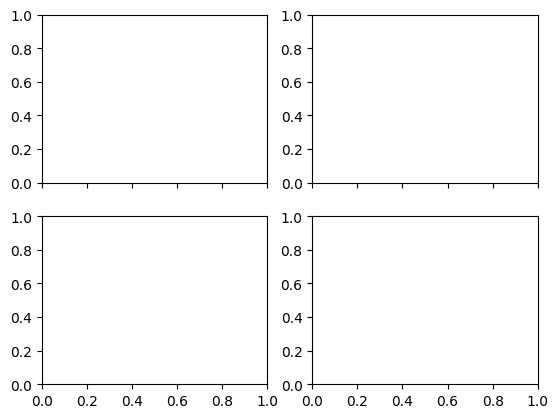

In [6]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(6.4, 4.8), dpi=100)
axes = ax.flat
axes[0].plot(data_pre["times"]/1000, data_pre["V_m"])
axes[1].plot(data_astro["times"]/1000, data_astro["IP3"])
axes[2].plot(data_post["times"]/1000, data_post["I_SIC"])
axes[3].plot(data_astro["times"]/1000, data_astro["Ca_astro"])
axes[0].set_title(f"Presynaptic neuron\n(Poisson rate = {poisson_rate_neuro} Hz)")
axes[0].set_ylabel("Membrane potential (mV)")
axes[2].set_title("Postsynaptic neuron")
axes[2].set_ylabel("Slow inward current (pA)")
axes[2].set_xlabel("Time (s)")
axes[1].set_title("Astrocyte")
axes[1].set_ylabel(r"[IP$_{3}$] ($\mu$M)")
axes[3].set_ylabel(r"[Ca$^{2+}$] ($\mu$M)")
axes[3].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()
plt.close()